# RERUN NEEDED

# 0. Introduction

Generative classifiers model the joint distribution $$p(\mathbf{x}, y)$$
And use the Bayes rule to classify a new feature vector $\mathbf{x}$ $$p(y=c|\mathbf{x}, \mathbf{\theta}) \propto p(\mathbf{x}|y=c, \mathbf{\theta})p(y=c|\mathbf{\theta})$$
The key to using such models is specifying a suitable form for the class-conditional density $p(\mathbf{x}|y=c, \mathbf{\theta})$, and all of the following models (Gaussian Naive Bayes, LDA and QDA) make the assumption that the class-conditional density follows a multivariate normal (MVN) distribution. I.e. they make the fundamental assumption that: $$p(\mathbf{x}|y=c, \mathbf{\theta})=\mathcal{N}(\mathbf{x}|\mathbf{\mu_c}, \mathbf{\Sigma_c})$$ Where additional assumptions are made by both GNB and LDA.

- LDA further assumes that the covariance matrices between the class-conditional probabilities are shared, i.e. $\mathbf{\Sigma_c} = \mathbf{\Sigma}$

- GNB further assumes that the covariance matrices are diagonal, implying feature independence, given the class label, i.e. $$p(\mathbf{x}|y=c,\mathbf{\theta}) = \prod_{j=1}^{D} \mathcal{N}(x_j|\mu_{jc}, \sigma_{jc}^2)$$

In [1]:
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis


import utils.datasets_utils as datasets_utils
import utils.classification_utils as classification_utils

sns.set_palette("Set2")
sns.set_style("whitegrid")

In [2]:
datasets = datasets_utils.load_datasets()
datasets_wrapper = datasets_utils.DatasetsWrapper(datasets)

The shapes of the datasets

In [3]:
datasets_wrapper.get_shapes()

,train_X,val_X,test_X,train_y,val_y,test_y
spectral_original,"(21572, 196)","(2397, 196)","(5993, 196)","(21572,)","(2397,)","(5993,)"
all_original,"(21572, 294)","(2397, 294)","(5993, 294)","(21572,)","(2397,)","(5993,)"
pca_original,"(21572, 141)","(2397, 141)","(5993, 141)","(21572,)","(2397,)","(5993,)"
umap_original,"(21572, 15)","(2397, 15)","(5993, 15)","(21572,)","(2397,)","(5993,)"
spectral_modified,"(20714, 196)","(2397, 196)","(5993, 196)","(20714,)","(2397,)","(5993,)"
all_modified,"(20714, 294)","(2397, 294)","(5993, 294)","(20714,)","(2397,)","(5993,)"
pca_modified,"(20714, 140)","(2397, 140)","(5993, 140)","(20714,)","(2397,)","(5993,)"
umap_modified,"(20714, 15)","(2397, 15)","(5993, 15)","(20714,)","(2397,)","(5993,)"


# 1. Training

In [4]:
nb_classifiers = [classification_utils.ClassifierFactory.create_instance(
    dataset=dataset, 
    classifier=GaussianNB()
) for dataset in datasets]

lda_classifiers = [classification_utils.ClassifierFactory.create_instance(
    dataset=dataset,
    classifier=LinearDiscriminantAnalysis()
) for dataset in datasets]

qda_classifiers = [classification_utils.ClassifierFactory.create_instance(
    dataset=dataset, 
    classifier=QuadraticDiscriminantAnalysis()
) for dataset in datasets]

In [5]:
nb_cl_collection = classification_utils.ClassifiersCollection(nb_classifiers)
lda_cl_collection = classification_utils.ClassifiersCollection(lda_classifiers)
qda_cl_collection = classification_utils.ClassifiersCollection(qda_classifiers)

In [6]:
nb_cl_collection.fit_classifiers()

Fitting classifiers...


100%|██████████| 8/8 [00:00<00:00, 11.86it/s]

Done


In [7]:
lda_cl_collection.fit_classifiers()

Fitting classifiers...


100%|██████████| 8/8 [00:04<00:00,  1.90it/s]

Done


In [8]:
warnings.filterwarnings("ignore", category=UserWarning, message="Variables are collinear")
qda_cl_collection.fit_classifiers()

Fitting classifiers...


100%|██████████| 8/8 [00:05<00:00,  1.47it/s]

Done


# 2. Results

## 2.1 Gaussian Naive Bayes

In [9]:
nb_evaluation_df = nb_cl_collection.evaluate_classifiers()

In [10]:
nb_evaluation_df[[dataset.name for dataset in datasets if 'original' in dataset.name]]

spectral_original                     all_original  \
                                 train       val      test        train   
accuracy                      0.417161  0.406758  0.403638     0.381838   
precision (weighted)          0.510127  0.512061  0.498806     0.521633   
recall (weighted)             0.417161  0.406758  0.403638     0.381838   
f1 (weighted)                 0.425050  0.415733  0.413069     0.403906   

                                         pca_original                      \
                           val      test        train       val      test   
accuracy              0.376721  0.376606     0.342296  0.324990  0.326881   
precision (weighted)  0.523005  0.519298     0.478008  0.459615  0.460933   
recall (weighted)     0.376721  0.376606     0.342296  0.324990  0.326881   
f1 (weighted)         0.397529  0.400326     0.378826  0.361082  0.366673   

                     umap_original                      
                             train       val      test  
accuracy                  0.459438  0.453901  0.456199  
precision (weighted)      0.426551  0.397864  0.423617  
recall (weighted)         0.459438  0.453901  0.456199  
f1 (weighted)             0.407987  0.402303  0.404980

In [11]:
nb_evaluation_df[[dataset.name for dataset in datasets if 'modified' in dataset.name]]

spectral_modified                     all_modified  \
                                 train       val      test        train   
accuracy                      0.415902  0.408010  0.403804     0.398040   
precision (weighted)          0.447456  0.511250  0.499858     0.458739   
recall (weighted)             0.415902  0.408010  0.403804     0.398040   
f1 (weighted)                 0.404487  0.423869  0.419508     0.397658   

                                         pca_modified                      \
                           val      test        train       val      test   
accuracy              0.391322  0.393626     0.333060  0.300793  0.303521   
precision (weighted)  0.512142  0.513379     0.440610  0.465459  0.469133   
recall (weighted)     0.391322  0.393626     0.333060  0.300793  0.303521   
f1 (weighted)         0.412434  0.416697     0.354443  0.343703  0.348640   

                     umap_modified                      
                             train       val      test  
accuracy                  0.395095  0.407176  0.406808  
precision (weighted)      0.355134  0.371651  0.377589  
recall (weighted)         0.395095  0.407176  0.406808  
f1 (weighted)             0.315051  0.352878  0.349825

- spectral_modified - best f1 on test
- UMAP_original     - best recall and accuracy on test
- all_modified      - best precision on test

In [12]:
nb_spectral_modified_classifier = nb_cl_collection.get_classifier('spectral_modified')
nb_umap_original_classifier = nb_cl_collection.get_classifier('umap_original')
nb_all_modified_classifier = nb_cl_collection.get_classifier('all_modified')

Results for the classifier trained on the spectral_modified dataset

In [13]:
nb_spectral_modified_classifier.get_clf_evaluation().get_scores()

,train,val,test
accuracy,0.415902,0.408010,0.403804
precision (weighted),0.447456,0.511250,0.499858
recall (weighted),0.415902,0.408010,0.403804
f1 (weighted),0.404487,0.423869,0.419508


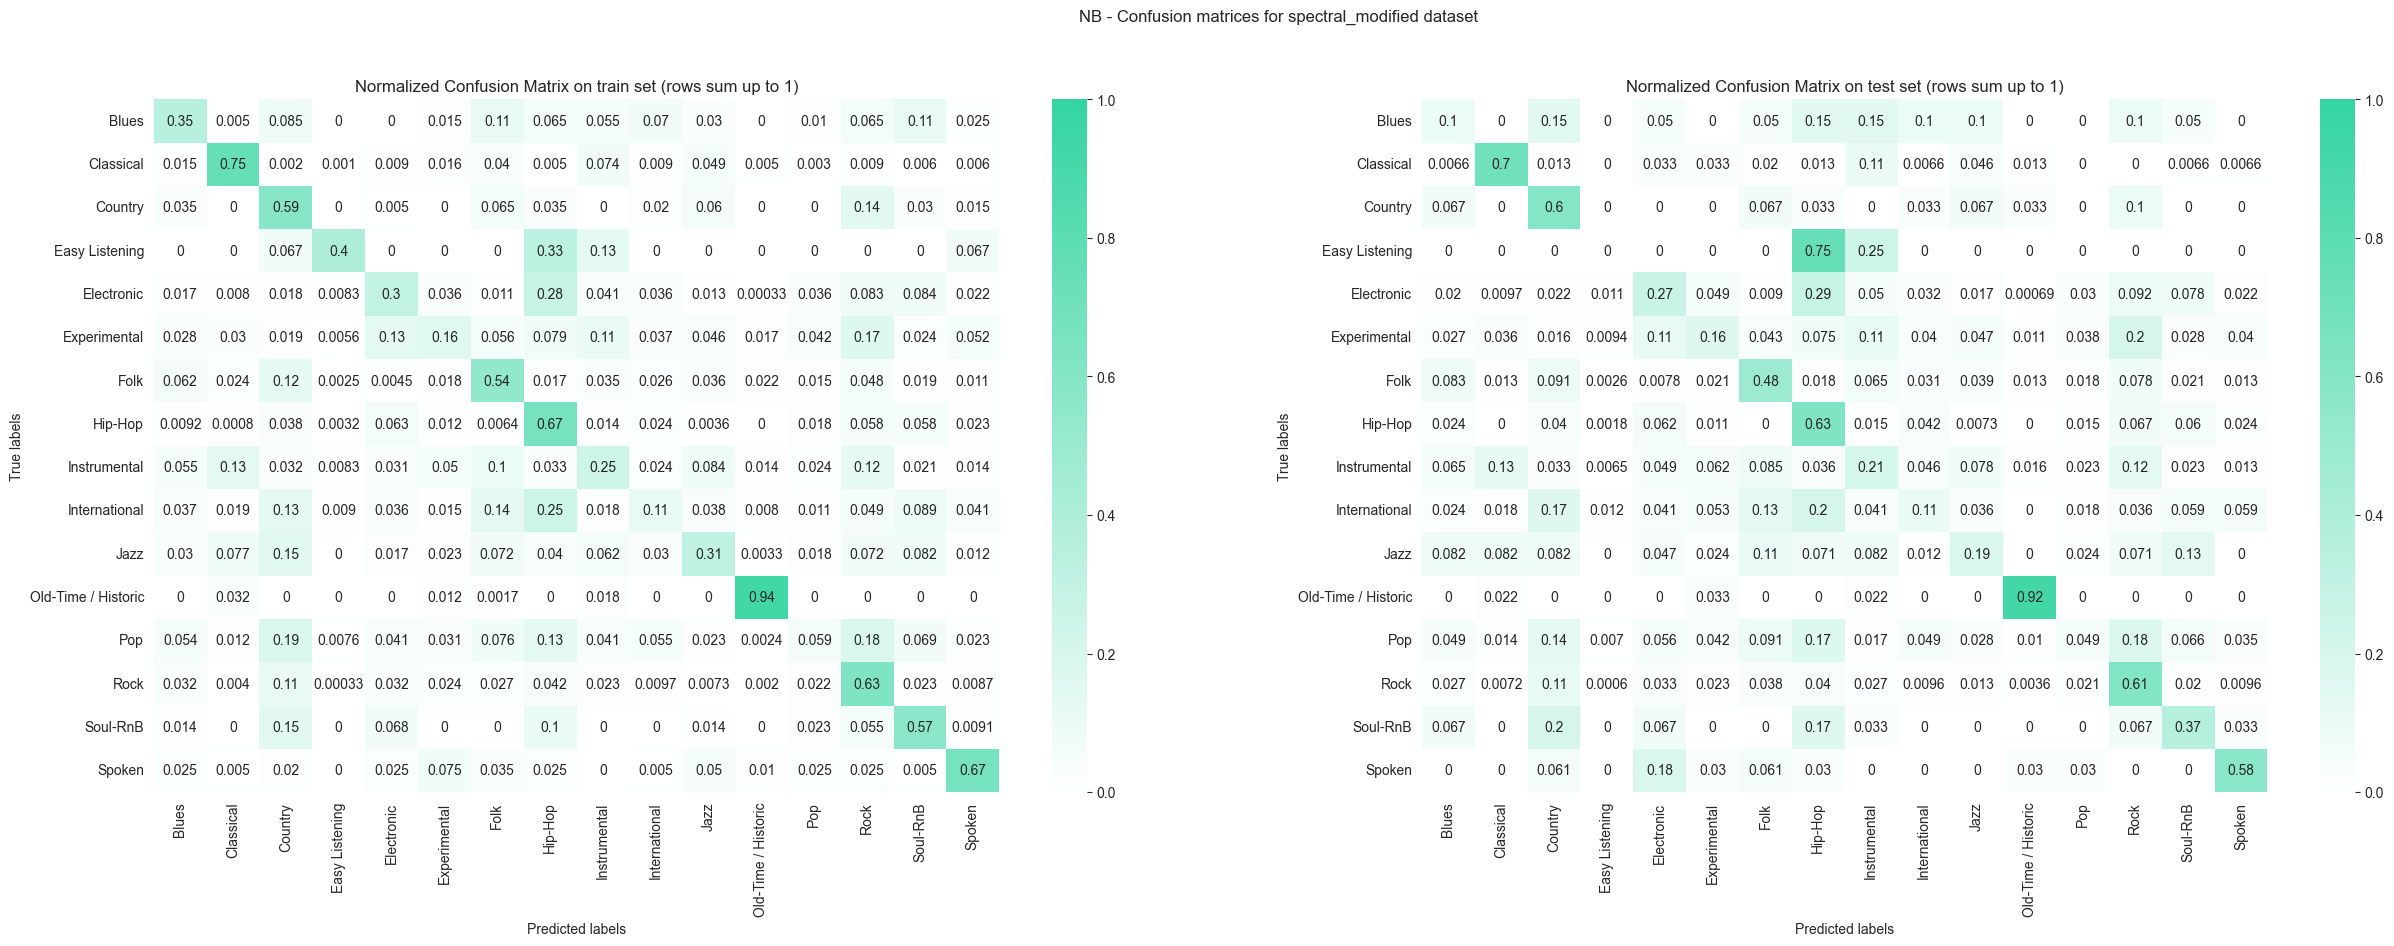

In [14]:
fig, axis = plt.subplots(1, 2, figsize=(30, 9))
nb_spectral_modified_classifier.get_clf_evaluation().plot_confusion_matrix(ax=axis[0], on_set='train')
nb_spectral_modified_classifier.get_clf_evaluation().plot_confusion_matrix(ax=axis[1], on_set='test')
fig.suptitle('NB - Confusion matrices for spectral_modified dataset')
plt.show()

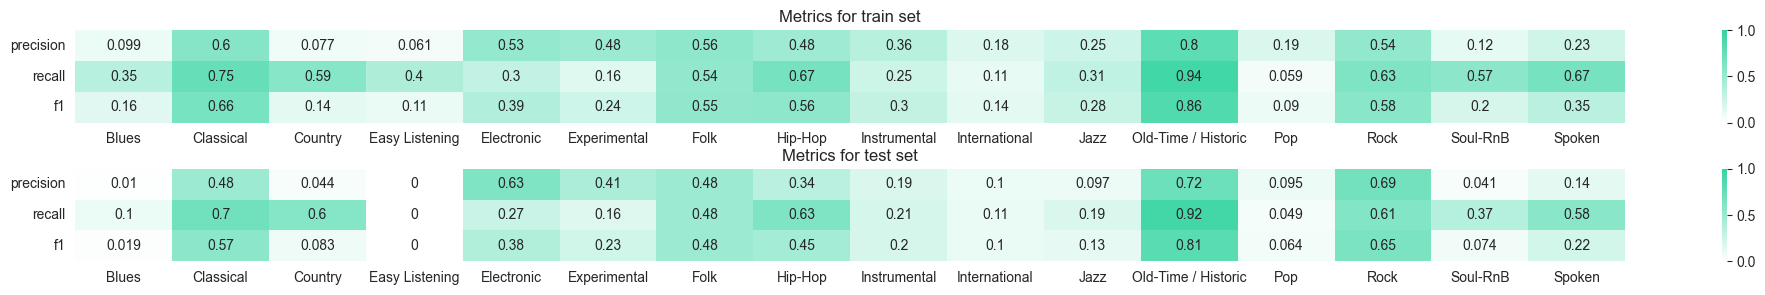

In [15]:
_, ax = plt.subplots(2, 1, figsize=(25, 3))
nb_spectral_modified_classifier.get_clf_evaluation().plot_metrics_per_class(ax=ax[0], on_set='train')
nb_spectral_modified_classifier.get_clf_evaluation().plot_metrics_per_class(ax=ax[1], on_set='test')
plt.subplots_adjust(hspace=0.5)
plt.show()

Results for the classifier trained on the umap_original dataset

In [16]:
nb_umap_original_classifier.get_clf_evaluation().get_scores()

,train,val,test
accuracy,0.459438,0.453901,0.456199
precision (weighted),0.426551,0.397864,0.423617
recall (weighted),0.459438,0.453901,0.456199
f1 (weighted),0.407987,0.402303,0.404980


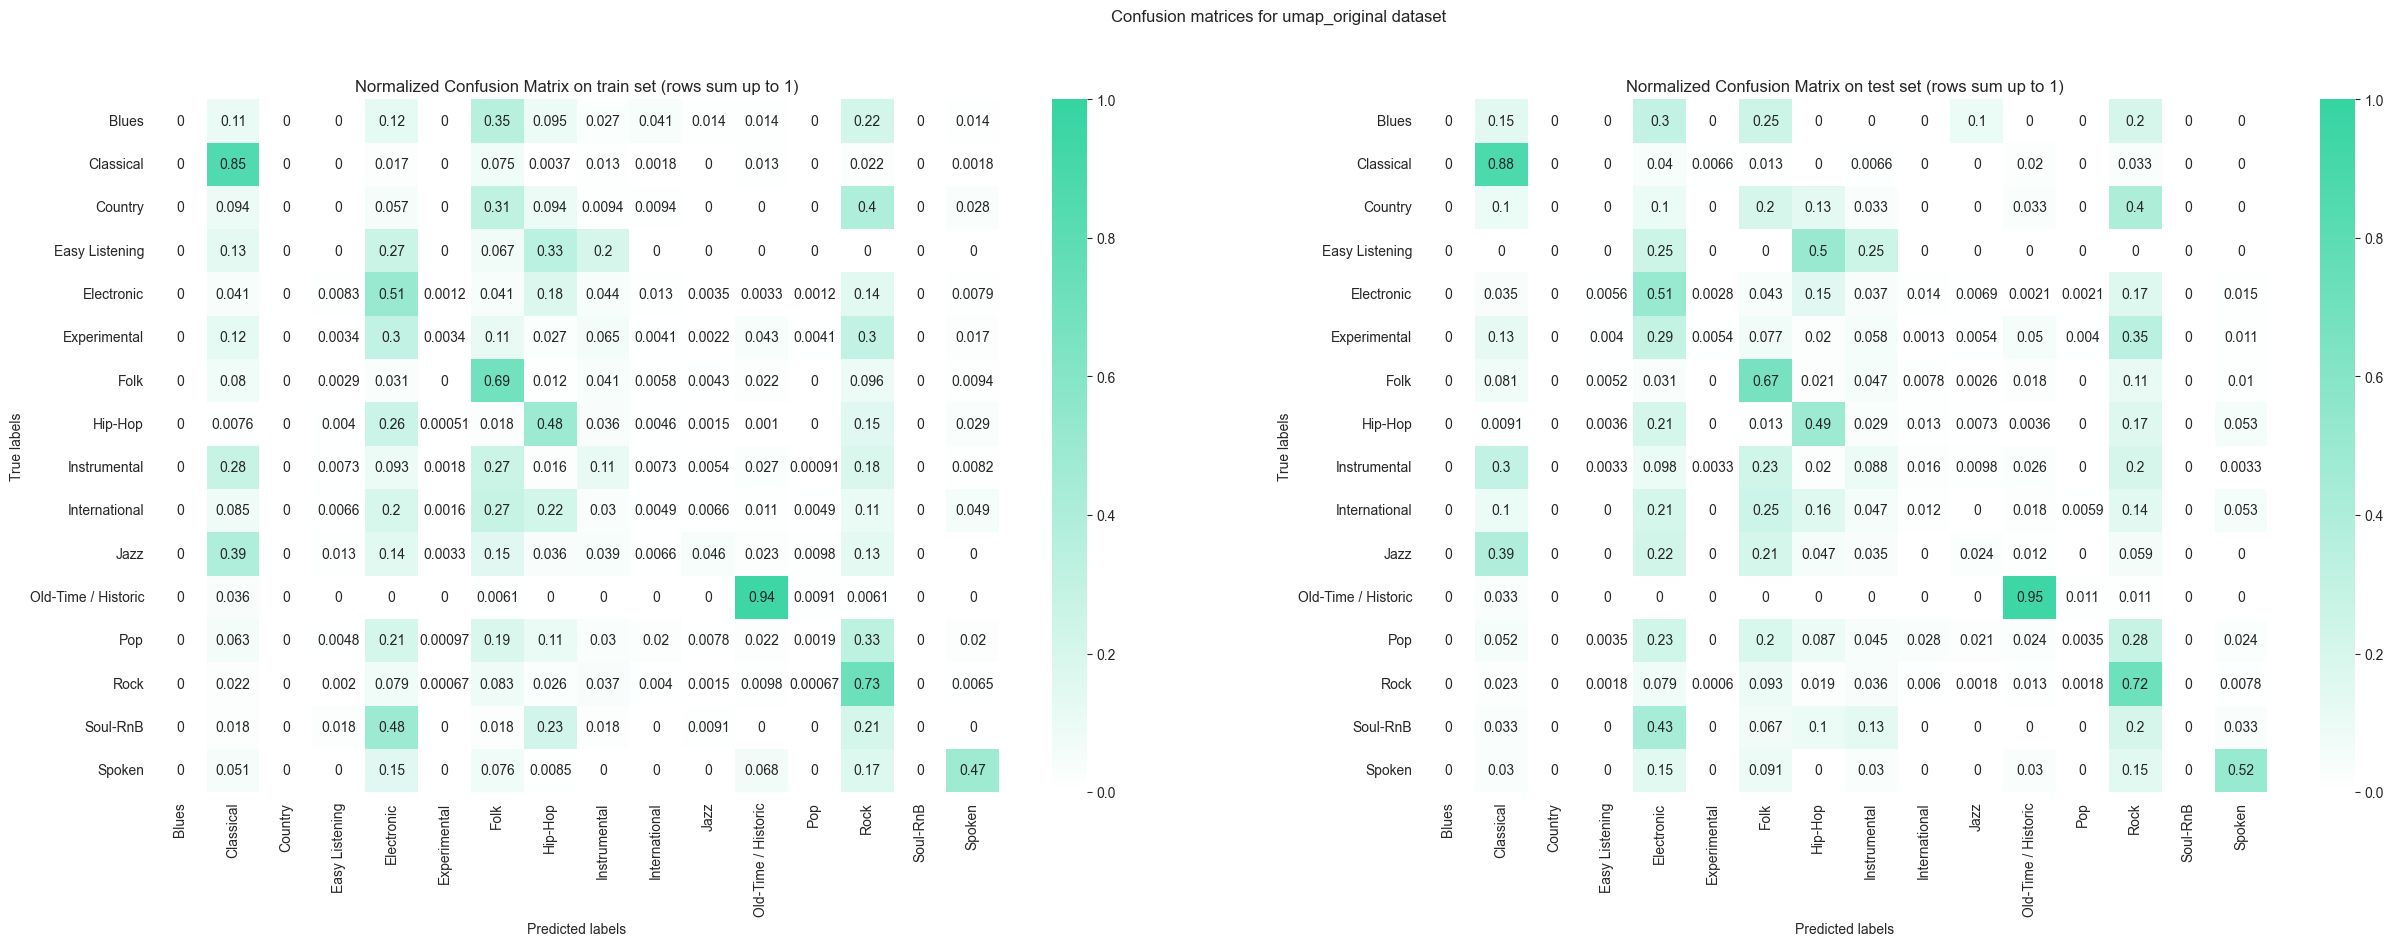

In [17]:
fig, axis = plt.subplots(1, 2, figsize=(30, 9))
nb_umap_original_classifier.get_clf_evaluation().plot_confusion_matrix(ax=axis[0], on_set='train')
nb_umap_original_classifier.get_clf_evaluation().plot_confusion_matrix(ax=axis[1], on_set='test')
fig.suptitle('Confusion matrices for umap_original dataset')
plt.show()

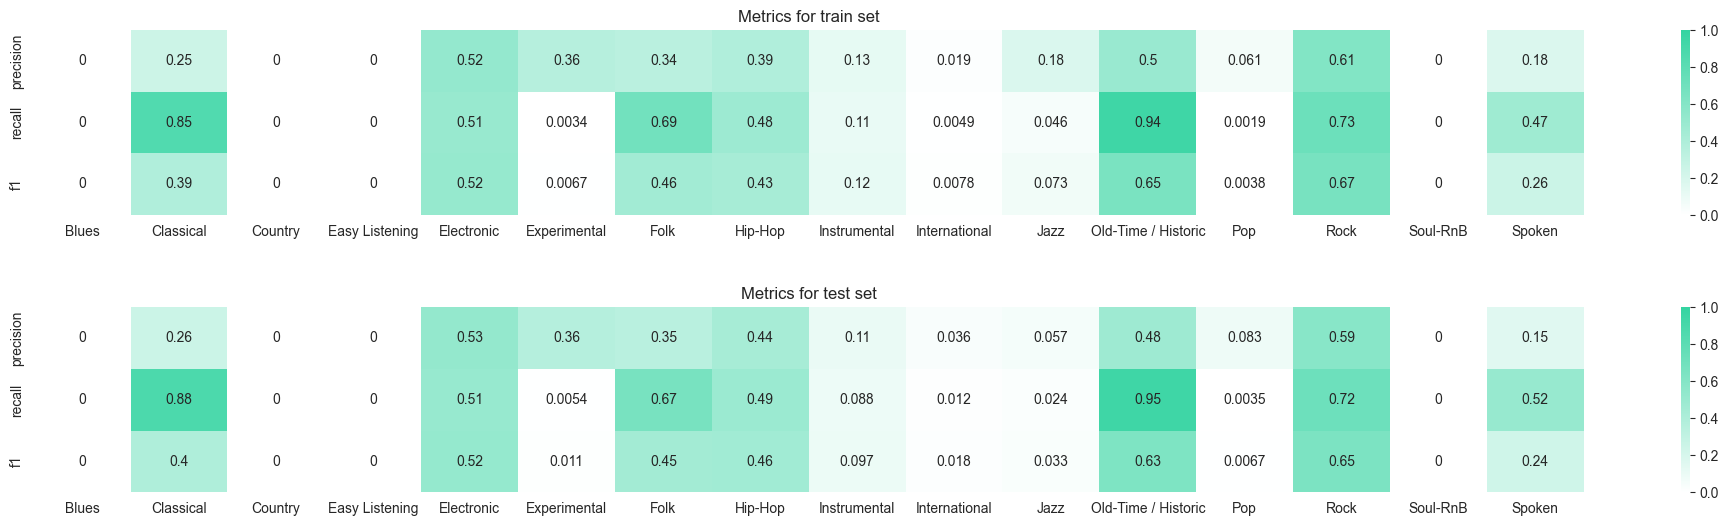

In [18]:
_, ax = plt.subplots(2, 1, figsize=(25, 6))
nb_umap_original_classifier.get_clf_evaluation().plot_metrics_per_class(ax=ax[0], on_set='train')
nb_umap_original_classifier.get_clf_evaluation().plot_metrics_per_class(ax=ax[1], on_set='test')
plt.subplots_adjust(hspace=0.5)
plt.show()

Results for the classifier trained on the all_modified dataset

In [19]:
nb_all_modified_classifier.get_clf_evaluation().get_scores()

,train,val,test
accuracy,0.398040,0.391322,0.393626
precision (weighted),0.458739,0.512142,0.513379
recall (weighted),0.398040,0.391322,0.393626
f1 (weighted),0.397658,0.412434,0.416697


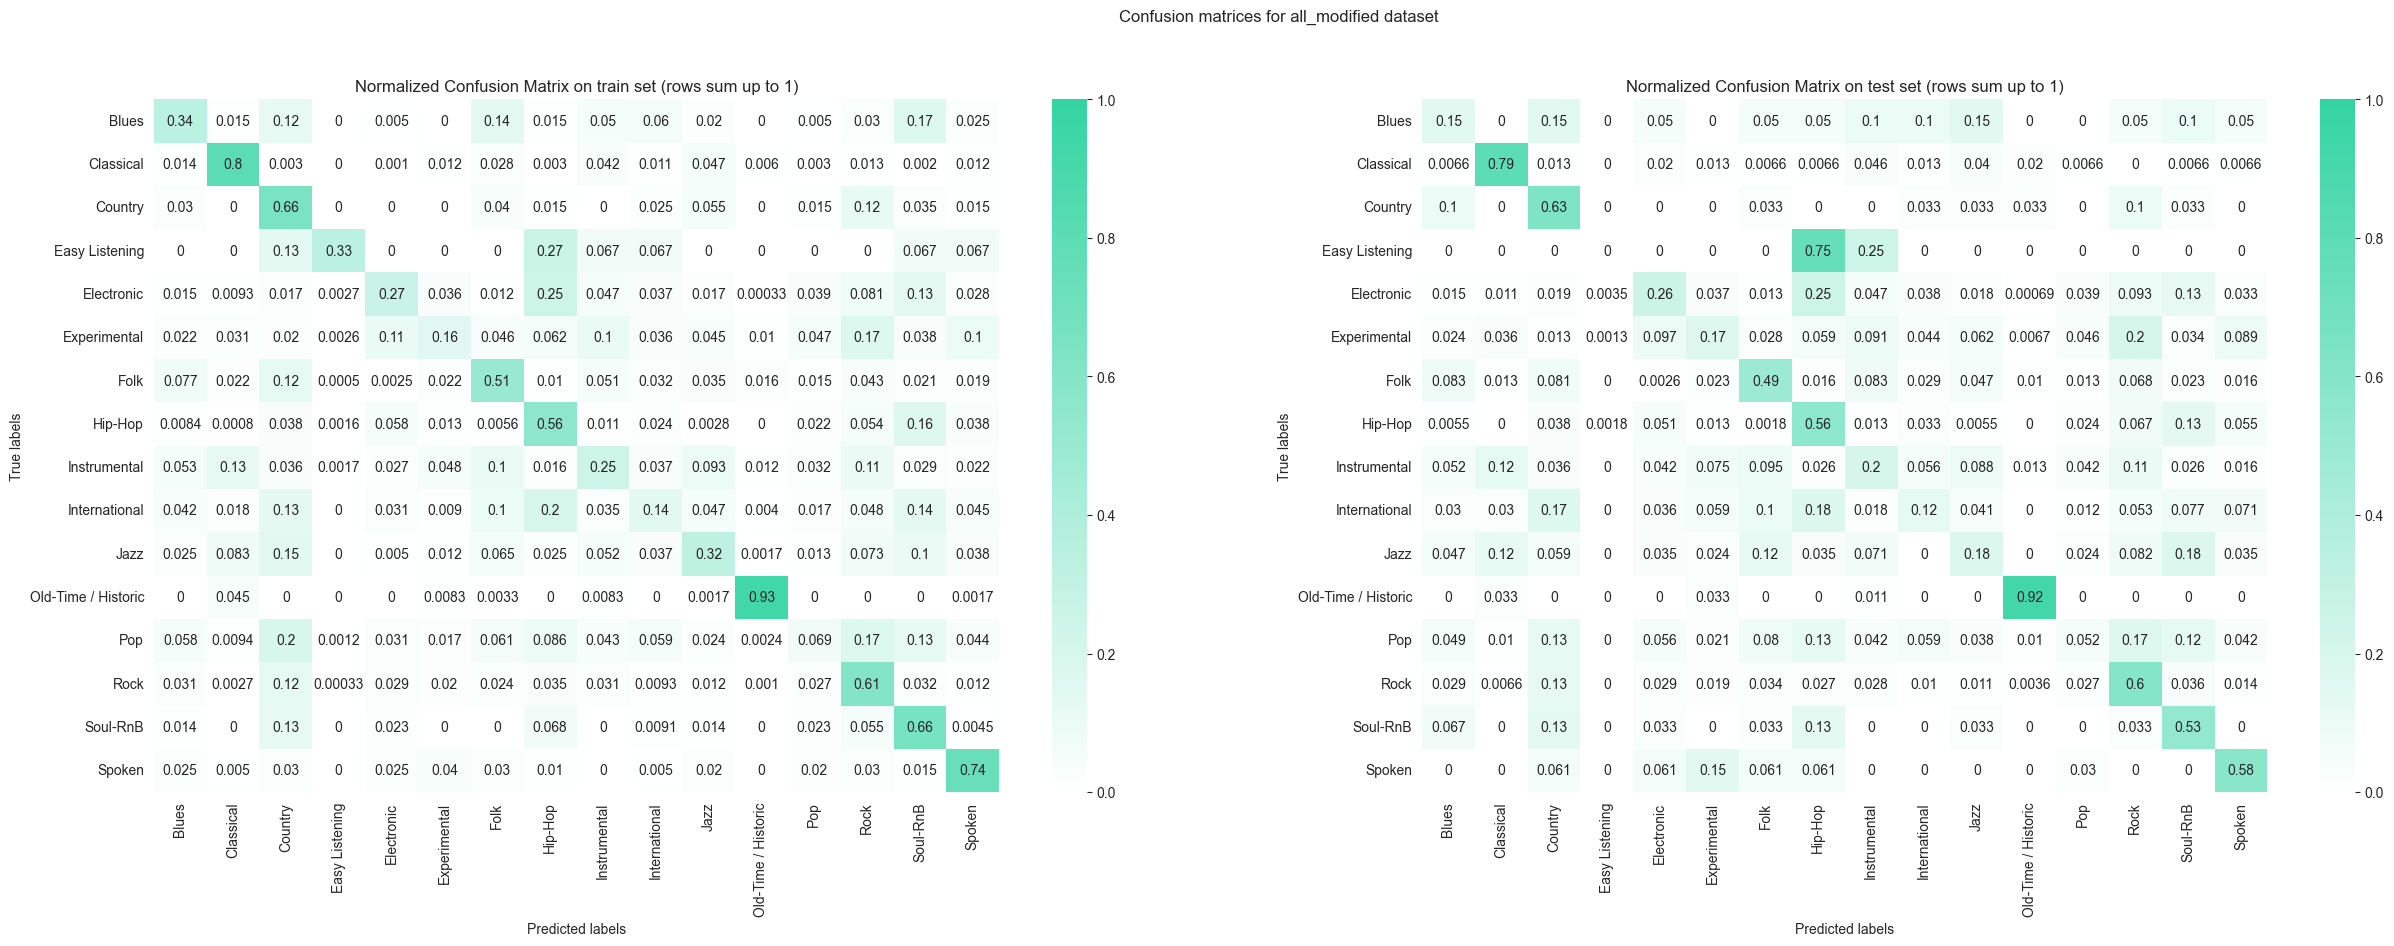

In [20]:
fig, axis = plt.subplots(1, 2, figsize=(30, 9))
nb_all_modified_classifier.get_clf_evaluation().plot_confusion_matrix(ax=axis[0], on_set='train')
nb_all_modified_classifier.get_clf_evaluation().plot_confusion_matrix(ax=axis[1], on_set='test')
fig.suptitle('Confusion matrices for all_modified dataset')
plt.show()

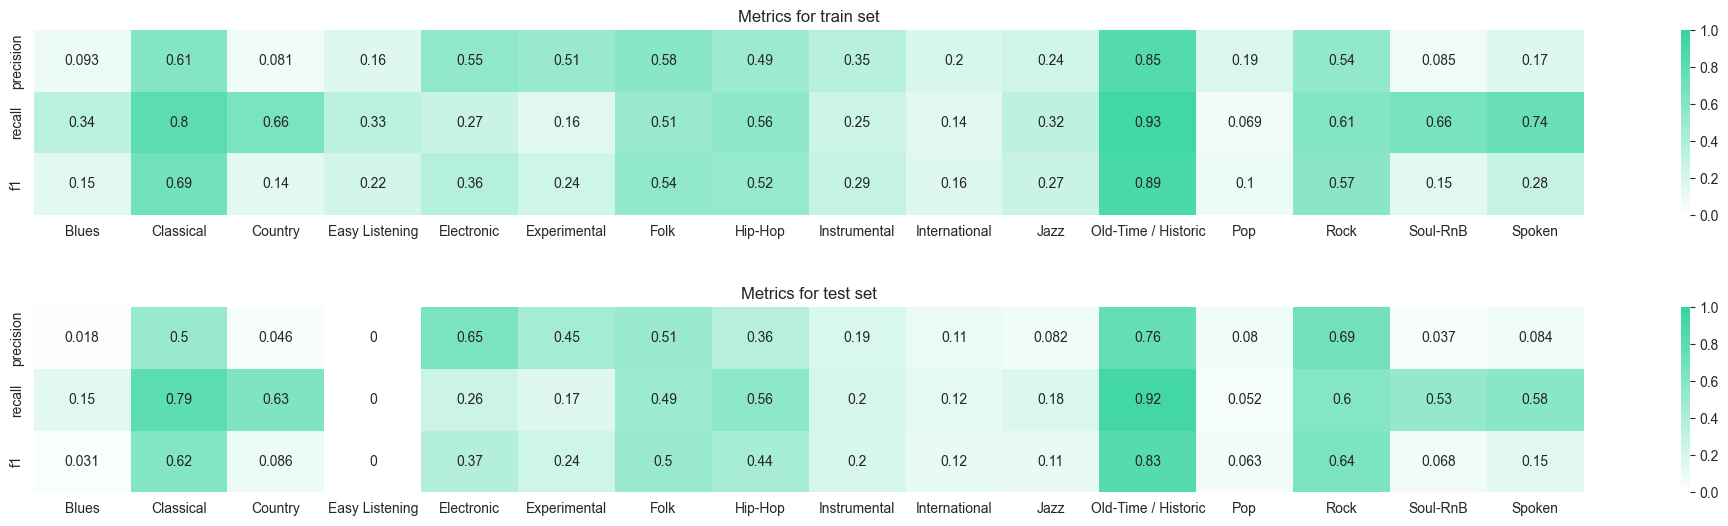

In [21]:
_, ax = plt.subplots(2, 1, figsize=(25, 6))
nb_all_modified_classifier.get_clf_evaluation().plot_metrics_per_class(ax=ax[0], on_set='train')
nb_all_modified_classifier.get_clf_evaluation().plot_metrics_per_class(ax=ax[1], on_set='test')
plt.subplots_adjust(hspace=0.5)
plt.show()

## 2.2 LDA

In [22]:
lda_evaluation_df = lda_cl_collection.evaluate_classifiers()

In [23]:
lda_evaluation_df[[dataset.name for dataset in datasets if 'original' in dataset.name]]

spectral_original                     all_original  \
                                 train       val      test        train   
accuracy                      0.622335  0.611181  0.604872     0.642221   
precision (weighted)          0.600304  0.590595  0.578405     0.625548   
recall (weighted)             0.622335  0.611181  0.604872     0.642221   
f1 (weighted)                 0.603878  0.593887  0.584675     0.629167   

                                         pca_original                      \
                           val      test        train       val      test   
accuracy              0.632874  0.619389     0.616540  0.602837  0.606875   
precision (weighted)  0.614373  0.600072     0.592412  0.578835  0.582433   
recall (weighted)     0.632874  0.619389     0.616540  0.602837  0.606875   
f1 (weighted)         0.617960  0.605034     0.596044  0.581326  0.585195   

                     umap_original                      
                             train       val      test  
accuracy                  0.520536  0.508552  0.510596  
precision (weighted)      0.480459  0.468337  0.474935  
recall (weighted)         0.520536  0.508552  0.510596  
f1 (weighted)             0.486744  0.476993  0.479351

In [24]:
lda_evaluation_df[[dataset.name for dataset in datasets if 'modified' in dataset.name]]

spectral_modified                     all_modified  \
                                 train       val      test        train   
accuracy                      0.579994  0.577806  0.566161     0.611374   
precision (weighted)          0.572116  0.602827  0.593982     0.608257   
recall (weighted)             0.579994  0.577806  0.566161     0.611374   
f1 (weighted)                 0.572588  0.583574  0.574276     0.607627   

                                         pca_modified                      \
                           val      test        train       val      test   
accuracy              0.598248  0.581345     0.571787  0.576971  0.567162   
precision (weighted)  0.627157  0.617257     0.563083  0.606368  0.591073   
recall (weighted)     0.598248  0.581345     0.571787  0.576971  0.567162   
f1 (weighted)         0.606072  0.592485     0.562530  0.584285  0.573174   

                     umap_modified                      
                             train       val      test  
accuracy                  0.454958  0.471005  0.462873  
precision (weighted)      0.443062  0.494884  0.468190  
recall (weighted)         0.454958  0.471005  0.462873  
f1 (weighted)             0.408136  0.455213  0.443368

In [25]:
lda_all_original_classifier = lda_cl_collection.get_classifier('all_original')

In [26]:
lda_all_original_classifier.get_clf_evaluation().get_scores()

,train,val,test
accuracy,0.642221,0.632874,0.619389
precision (weighted),0.625548,0.614373,0.600072
recall (weighted),0.642221,0.632874,0.619389
f1 (weighted),0.629167,0.617960,0.605034


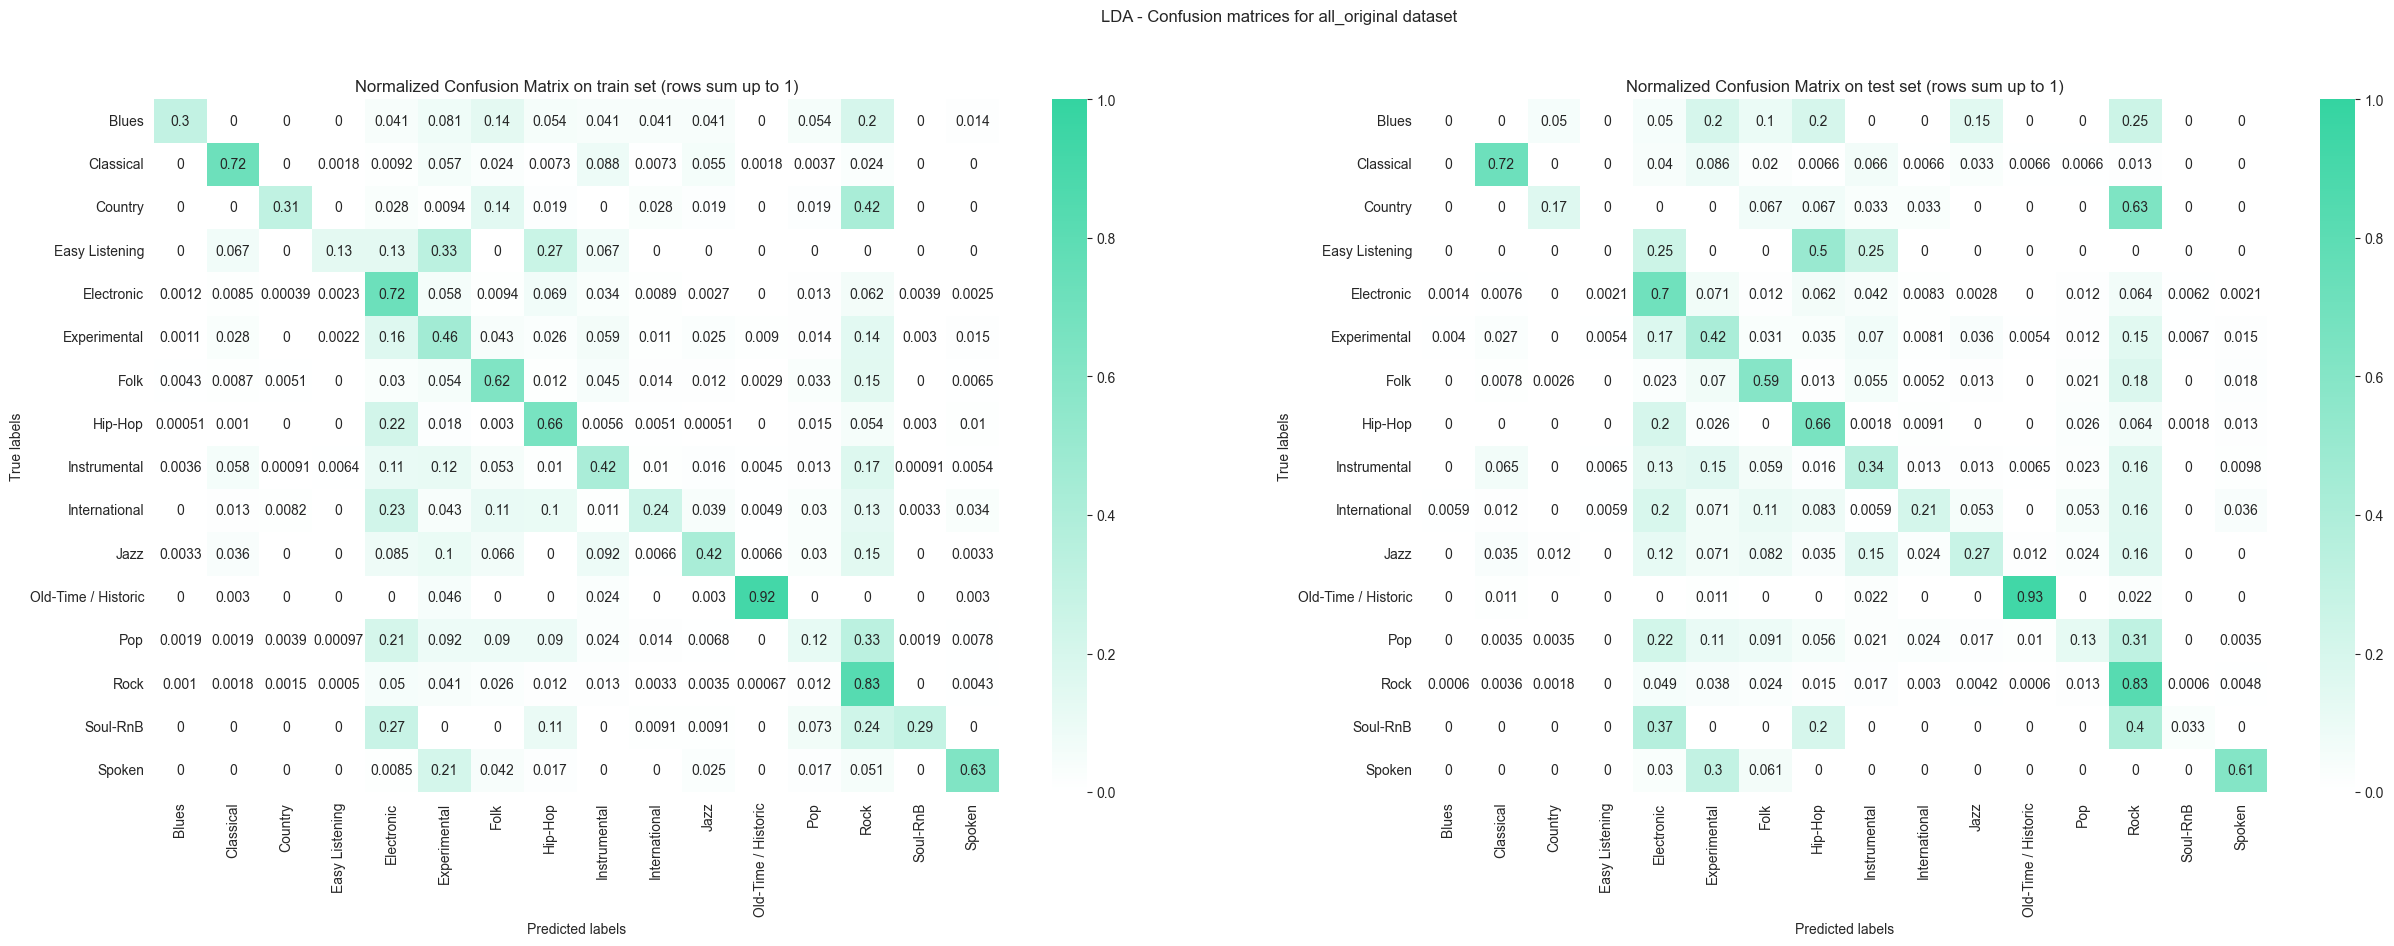

In [27]:
fig, axis = plt.subplots(1, 2, figsize=(30, 9))
lda_all_original_classifier.get_clf_evaluation().plot_confusion_matrix(ax=axis[0], on_set='train')
lda_all_original_classifier.get_clf_evaluation().plot_confusion_matrix(ax=axis[1], on_set='test')
fig.suptitle('LDA - Confusion matrices for all_original dataset')
plt.show()

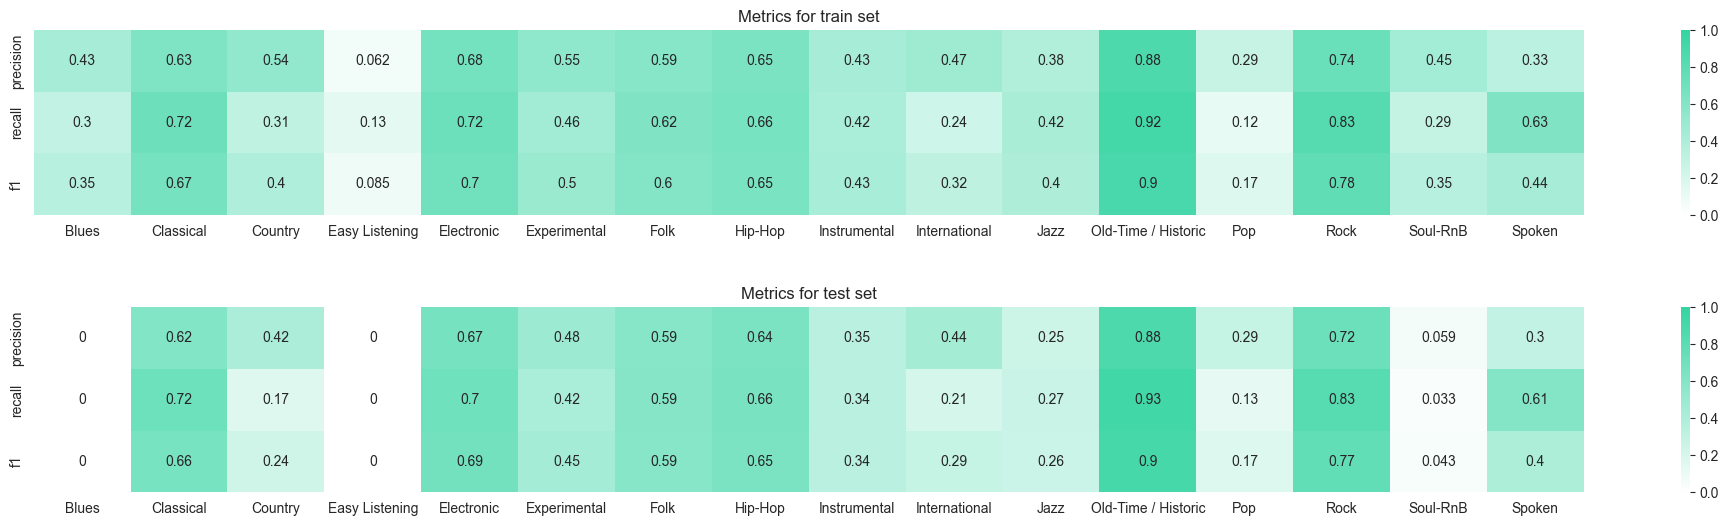

In [28]:
_, ax = plt.subplots(2, 1, figsize=(25, 6))
lda_all_original_classifier.get_clf_evaluation().plot_metrics_per_class(ax=ax[0], on_set='train')
lda_all_original_classifier.get_clf_evaluation().plot_metrics_per_class(ax=ax[1], on_set='test')
plt.subplots_adjust(hspace=0.5)
plt.show()

## 2.3 QDA

In [29]:
qda_evaluation_df = qda_cl_collection.evaluate_classifiers()

In [30]:
qda_evaluation_df[[dataset.name for dataset in datasets if 'original' in dataset.name]]

spectral_original                     all_original  \
                                 train       val      test        train   
accuracy                      0.689134  0.532749  0.509928     0.269192   
precision (weighted)          0.731089  0.546377  0.522431     0.768348   
recall (weighted)             0.689134  0.532749  0.509928     0.269192   
f1 (weighted)                 0.690756  0.521150  0.497616     0.296740   

                                         pca_original                      \
                           val      test        train       val      test   
accuracy              0.158114  0.158185     0.441266  0.324155  0.328383   
precision (weighted)  0.558200  0.564728     0.691231  0.553157  0.555701   
recall (weighted)     0.158114  0.158185     0.441266  0.324155  0.328383   
f1 (weighted)         0.169374  0.171679     0.479655  0.363386  0.374766   

                     umap_original                      
                             train       val      test  
accuracy                  0.414009  0.411765  0.418989  
precision (weighted)      0.463741  0.428363  0.438018  
recall (weighted)         0.414009  0.411765  0.418989  
f1 (weighted)             0.383337  0.383442  0.389619

In [31]:
qda_evaluation_df[[dataset.name for dataset in datasets if 'modified' in dataset.name]]

spectral_modified                     all_modified  \
                                 train       val      test        train   
accuracy                      0.761417  0.512307  0.491240     0.474607   
precision (weighted)          0.775377  0.551511  0.531192     0.795267   
recall (weighted)             0.761417  0.512307  0.491240     0.474607   
f1 (weighted)                 0.759609  0.510001  0.487243     0.503711   

                                         pca_modified                      \
                           val      test        train       val      test   
accuracy              0.202336  0.198732     0.585112  0.367960  0.375271   
precision (weighted)  0.556414  0.510885     0.688490  0.537257  0.529105   
recall (weighted)     0.202336  0.198732     0.585112  0.367960  0.375271   
f1 (weighted)         0.241710  0.235423     0.592242  0.407280  0.413212   

                     umap_modified                      
                             train       val      test  
accuracy                  0.417013  0.396746  0.394460  
precision (weighted)      0.436678  0.467106  0.449316  
recall (weighted)         0.417013  0.396746  0.394460  
f1 (weighted)             0.357808  0.367139  0.362366

So singular matrix da objasnam sho se desilo za sho se olku losi rez

In [32]:
qda_spectral_original_classifier = qda_cl_collection.get_classifier('spectral_original')

In [33]:
qda_spectral_original_classifier.get_clf_evaluation().get_scores()

,train,val,test
accuracy,0.689134,0.532749,0.509928
precision (weighted),0.731089,0.546377,0.522431
recall (weighted),0.689134,0.532749,0.509928
f1 (weighted),0.690756,0.521150,0.497616


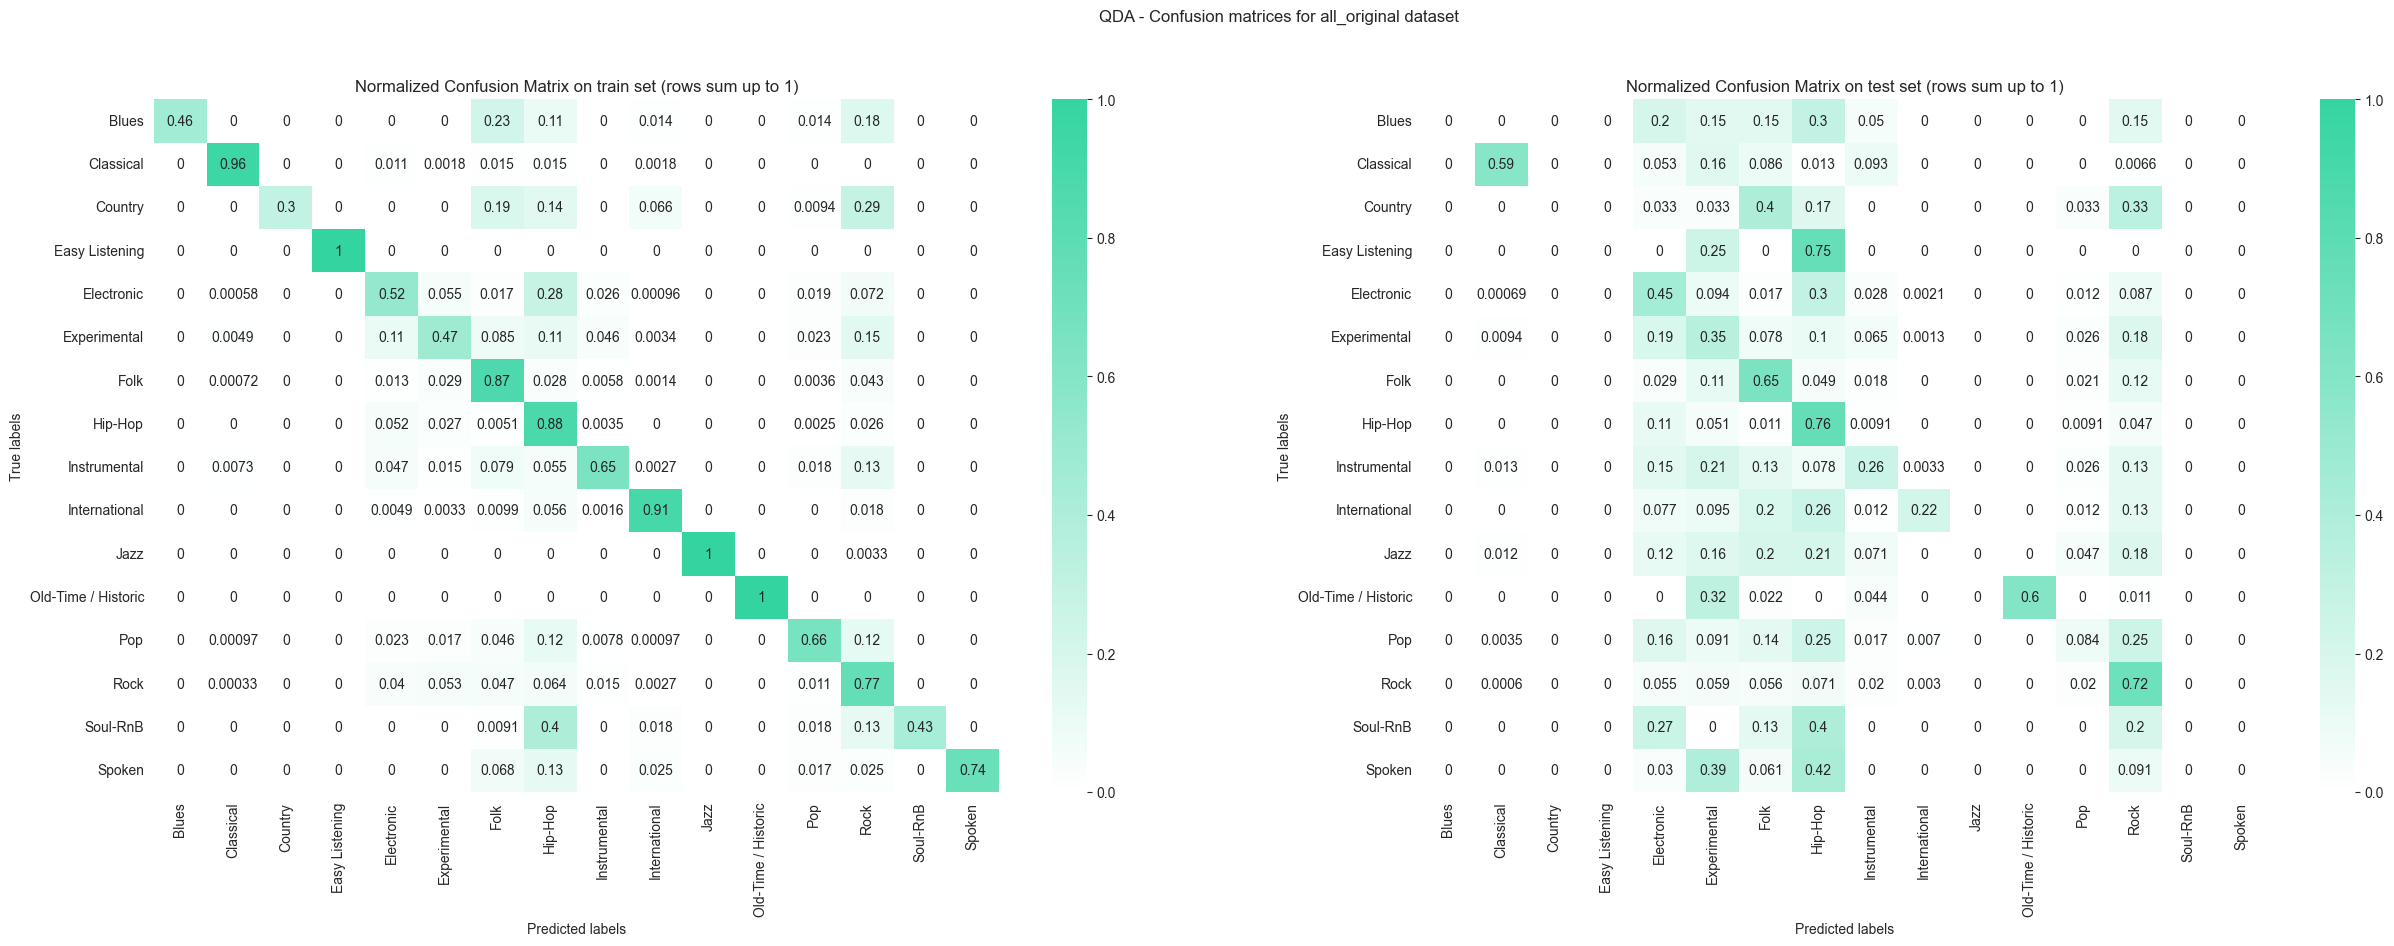

In [34]:
fig, axis = plt.subplots(1, 2, figsize=(30, 9))
qda_spectral_original_classifier.get_clf_evaluation().plot_confusion_matrix(ax=axis[0], on_set='train')
qda_spectral_original_classifier.get_clf_evaluation().plot_confusion_matrix(ax=axis[1], on_set='test')
fig.suptitle('QDA - Confusion matrices for all_original dataset')
plt.show()

We notice that this model **overfits** on the training data, and performs poorly on the test data. The issue is that the MLE estimates of the parameters badly overfit in high dimensions. In such cases, the MLE for a full covariance matrix (which is what QDA esitames) is usually ill-conditioned, meaning it is close to singular. There are several solutions to this problem:
- Using diagional covariance matix for each class (equivalent to using **GNB**)
- Using a full covariance matrix, but forcing it to be the same for all classes (equivalent to using **LDA**)
- Using a diagonal covariance matrix *and* forcing it to be shared
- Using a Bayesian approach by imposing a propr and then integrating it out (eg. Bayesian naive Bayes)
- Using MAP estimates instead of MLE estimates for the parameters of the model
- Projecting the data in lower dimensions and fitting Gaussians there

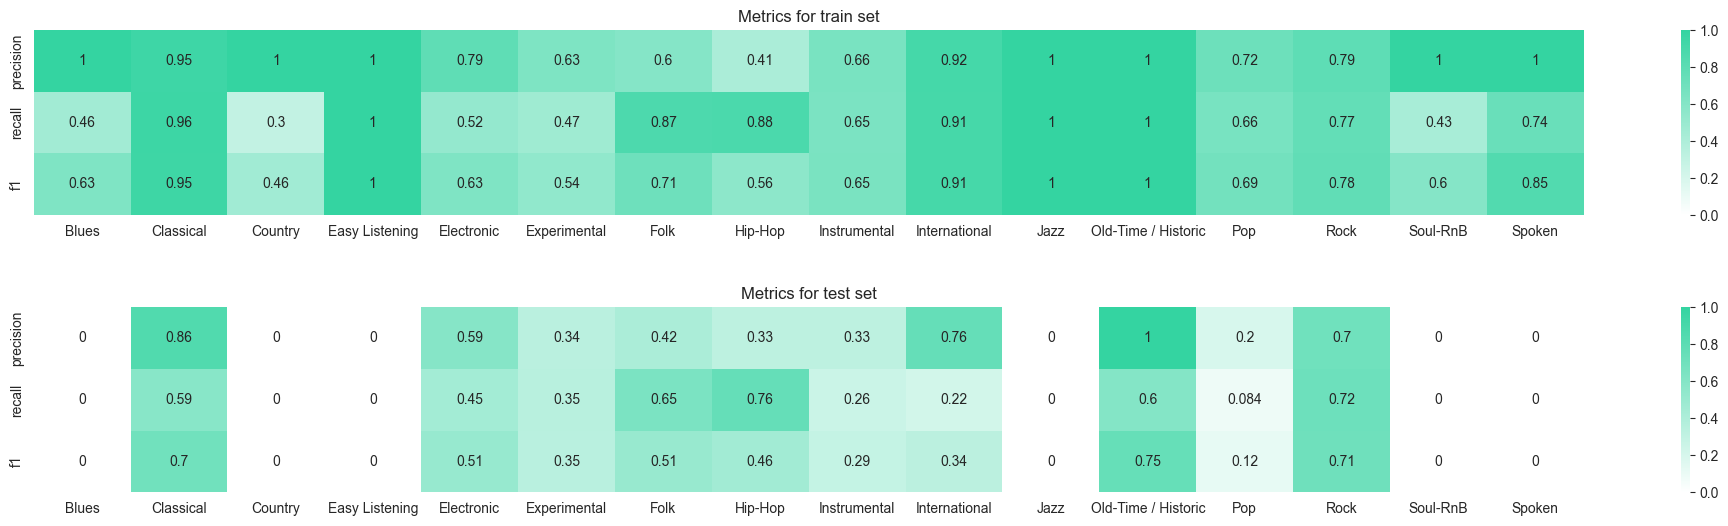

In [35]:
_, ax = plt.subplots(2, 1, figsize=(25, 6))
qda_spectral_original_classifier.get_clf_evaluation().plot_metrics_per_class(ax=ax[0], on_set='train')
qda_spectral_original_classifier.get_clf_evaluation().plot_metrics_per_class(ax=ax[1], on_set='test')
plt.subplots_adjust(hspace=0.5)
plt.show()

# 3. LDA Model Confidence

Next we will see how confident the model is when classifying a track, by using the predicted probabilities.

In [36]:
clf = lda_all_original_classifier.classifier
test_X = lda_all_original_classifier.dataset.test.X
test_y = lda_all_original_classifier.dataset.test.y

predicted_proba = pd.DataFrame(clf.predict_proba(test_X), columns=sorted(test_y.unique().tolist()), index=test_X.index)

# For each row, assign the column whose value for the predicted probability is the highest
predicted_proba['genre'] = predicted_proba.idxmax(axis=1)

Note that the figures below do not indicate that the model has classified the tracks correctly. Rather, they show the level of confidence the model has in its classification of the samples

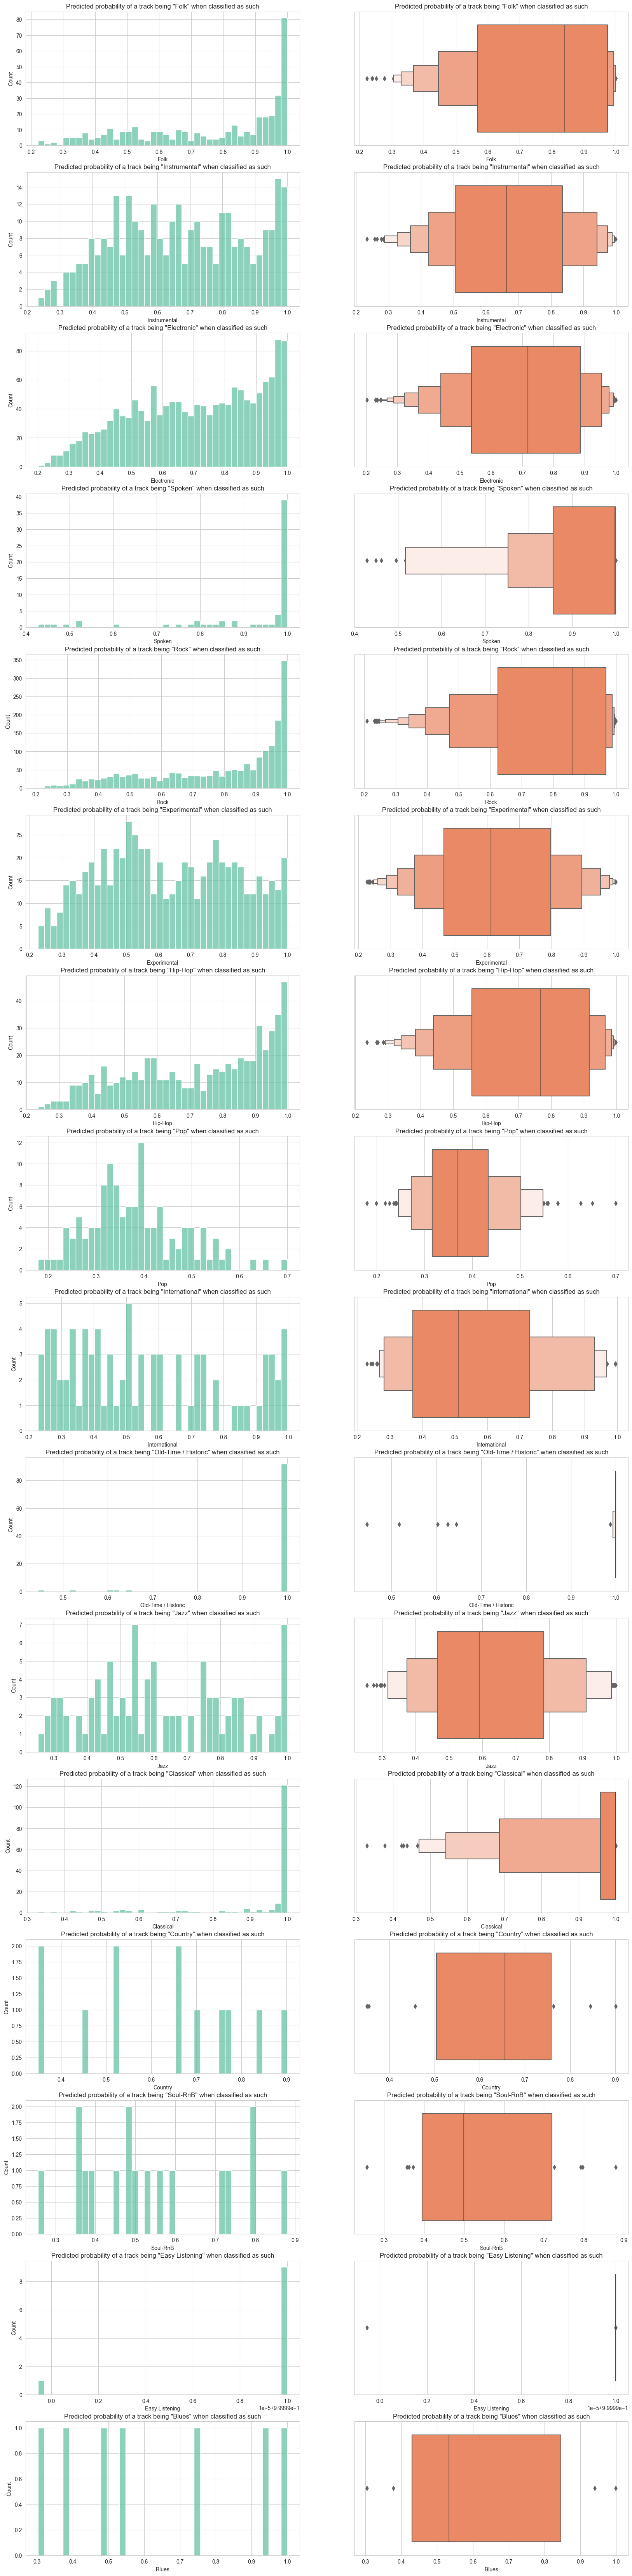

In [37]:
num_genres = predicted_proba['genre'].nunique()
ax_idxs = [(i, j) for i in range(num_genres) for j in range(2)]

fig, axs = plt.subplots(num_genres, 2, figsize=(20, 85))

k = 0
for genre in predicted_proba['genre'].unique():
    ax1_idx, ax2_idx = ax_idxs[k], ax_idxs[k + 1]
    ax1, ax2 = axs[ax1_idx[0]][ax1_idx[1]], axs[ax2_idx[0]][ax2_idx[1]]

    ax1.set_title(f'Predicted probability of a track being "{genre}" when classified as such')
    ax2.set_title(f'Predicted probability of a track being "{genre}" when classified as such')

    sns.histplot(x=predicted_proba[predicted_proba['genre'] == genre][genre], bins=40, ax=ax1)
    sns.boxenplot(x=predicted_proba[predicted_proba['genre'] == genre][genre], color='coral', ax=ax2)
    k += 2